
##Install Java, Spark, and Findspark

Java 8, Apache Spark 2.2.1, FindSpark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null


In [0]:
!java -version

openjdk version "11.0.3" 2019-04-16
OpenJDK Runtime Environment (build 11.0.3+7-Ubuntu-1ubuntu218.04.1)
OpenJDK 64-Bit Server VM (build 11.0.3+7-Ubuntu-1ubuntu218.04.1, mixed mode, sharing)


In [0]:
!wget --no-cookies --no-check-certificate 'https://archive.apache.org/dist/spark/spark-2.2.1/spark-2.2.1-bin-hadoop2.7.tgz'

--2019-05-17 18:25:49--  https://archive.apache.org/dist/spark/spark-2.2.1/spark-2.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 163.172.17.199
Connecting to archive.apache.org (archive.apache.org)|163.172.17.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200934340 (192M) [application/x-gzip]
Saving to: ‘spark-2.2.1-bin-hadoop2.7.tgz.1’

spark-2.2.1-bin-had 100%[===================>] 191.62M  32.4MB/s    in 6.8s    

2019-05-17 18:25:57 (28.0 MB/s) - ‘spark-2.2.1-bin-hadoop2.7.tgz.1’ saved [200934340/200934340]



In [0]:
!ls -l

total 393272
-rw-r--r--  1 root root    822526 May 17 18:25 CleanDataset.csv
drwxr-xr-x  1 root root      4096 May 15 16:23 sample_data
drwxrwxr-x 12 1001 1001      4096 Nov 24  2017 spark-2.2.1-bin-hadoop2.7
-rw-r--r--  1 root root 200934340 Nov 25  2017 spark-2.2.1-bin-hadoop2.7.tgz
-rw-r--r--  1 root root 200934340 Nov 25  2017 spark-2.2.1-bin-hadoop2.7.tgz.1
drwxr-xr-x  2 root root      4096 May 17 18:25 spark-warehouse


In [0]:
!rm -r spark-2.3.1-bin-hadoop2.7.tgz

rm: cannot remove 'spark-2.3.1-bin-hadoop2.7.tgz': No such file or directory


In [0]:
!rm -r spark-2.3.1-bin-hadoop2.7.tgz.1

rm: cannot remove 'spark-2.3.1-bin-hadoop2.7.tgz.1': No such file or directory


In [0]:
!tar xf  spark-2.2.1-bin-hadoop2.7.tgz

In [0]:
!ls

CleanDataset.csv	   spark-2.2.1-bin-hadoop2.7.tgz
sample_data		   spark-2.2.1-bin-hadoop2.7.tgz.1
spark-2.2.1-bin-hadoop2.7  spark-warehouse


In [0]:
!which gzip
!gzip -V

/bin/gzip
gzip 1.6
Copyright (C) 2007, 2010, 2011 Free Software Foundation, Inc.
Copyright (C) 1993 Jean-loup Gailly.
This is free software.  You may redistribute copies of it under the terms of
the GNU General Public License <http://www.gnu.org/licenses/gpl.html>.
There is NO WARRANTY, to the extent permitted by law.

Written by Jean-loup Gailly.


In [0]:
!pip install -q findspark

# Set Environment Variables
Setting the locations where Spark and Java are installed.

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.2.1-bin-hadoop2.7"

# Starting a SparkSession
This will start a local Spark session.

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

# Creating And Displaying A Sample Dataframe

In [0]:
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
df.show(30)

/content/spark-2.2.1-bin-hadoop2.7/python/pyspark/sql/session.py:336: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


+-----+
|hello|
+-----+
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
|world|
+-----+
only showing top 30 rows



# Flint

In [0]:
!conda create -n flint python=3.5 pandas

/bin/bash: conda: command not found


In [0]:
#Importing libraries 
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline
from pyspark.sql.functions import *
from pyspark import SparkContext
from pyspark.sql import SQLContext

In [0]:
#Loading the dataset
data = spark.read.csv(r'CleanDataset.csv',inferSchema=True,header=True)
data.show()
data.printSchema()
data.describe()
# inspect.getfullargspec(spark.read.csv)

+---------+---------+----------+----------+
|    S_avg|   Ds_avg|    Ws_avg|    Ot_avg|
+---------+---------+----------+----------+
|3.0899999|    88.18|       1.9| 5.3000002|
|1.8099999|    23.01|       0.2| 4.8899999|
|     1.89|38.110001|0.18000001| 4.8000002|
|   177.53|   1181.7|      5.04|      1.79|
|191.96001|  1200.48| 5.3099999|0.85000002|
|2.8900001|159.92999| 3.1500001|      6.73|
|  1259.62|  1800.15|       9.0| 4.6900001|
|95.709999|  1042.71| 4.5300002|     10.66|
|   921.19|   1781.9|      7.79| 5.8600001|
|805.09998|  1781.65| 7.6399999| 6.9299998|
|572.60999|1660.5601| 6.7199998| 7.1199999|
|   137.25|  1114.23| 4.9899998| 6.2600002|
|   143.42|1121.8199| 5.0100002| 6.6399999|
|162.32001|  1155.42| 4.6500001| 7.2199998|
|   129.45|  1086.96|      4.77| 6.4400001|
|2.1400001|     1.95|       0.1| 5.8800001|
|   144.64|  1130.66| 5.1999998| 8.2600002|
|76.980003|997.72998|      4.54| 6.4099998|
|129.35001|  1097.42| 4.9699998| 7.9699998|
|   172.92|   1177.1| 5.4899998|

DataFrame[summary: string, S_avg: string, Ds_avg: string, Ws_avg: string, Ot_avg: string]

In [0]:
#Creating a features column to be used
vectorAssembler = VectorAssembler(inputCols=['S_avg','Ws_avg','Ot_avg'], outputCol='features')
output=vectorAssembler.transform(data)

In [0]:
#Fitting the model
final_data=output.select('features','Ds_avg')

final_data.show()

train_data,test_data = final_data.randomSplit([0.7,0.3])


train_data.describe().show()
# test = test_data.describe().show()
test = test_data.describe()
test.show()
lr = LinearRegression(labelCol='Ds_avg')

lr_model=lr.fit(train_data)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)
test_results = lr_model.evaluate(test_data)

test_results.residuals.show()

test_results.rootMeanSquaredError
test_results.r2
final_data.describe().show()

unlabeled_data=test_data.select('features')
unlabeled_data.show()

Predictions=lr_model.transform(unlabeled_data)
Predictions.show()



+--------------------+---------+
|            features|   Ds_avg|
+--------------------+---------+
|[3.0899999,1.9,5....|    88.18|
|[1.8099999,0.2,4....|    23.01|
|[1.89,0.18000001,...|38.110001|
|  [177.53,5.04,1.79]|   1181.7|
|[191.96001,5.3099...|  1200.48|
|[2.8900001,3.1500...|159.92999|
|[1259.62,9.0,4.69...|  1800.15|
|[95.709999,4.5300...|  1042.71|
|[921.19,7.79,5.86...|   1781.9|
|[805.09998,7.6399...|  1781.65|
|[572.60999,6.7199...|1660.5601|
|[137.25,4.9899998...|  1114.23|
|[143.42,5.0100002...|1121.8199|
|[162.32001,4.6500...|  1155.42|
|[129.45,4.77,6.44...|  1086.96|
|[2.1400001,0.1,5....|     1.95|
|[144.64,5.1999998...|  1130.66|
|[76.980003,4.54,6...|997.72998|
|[129.35001,4.9699...|  1097.42|
|[172.92,5.4899998...|   1177.1|
+--------------------+---------+
only showing top 20 rows

+-------+------------------+
|summary|            Ds_avg|
+-------+------------------+
|  count|             17861|
|   mean|1105.8873141969223|
| stddev| 589.0255868455521|
|    min

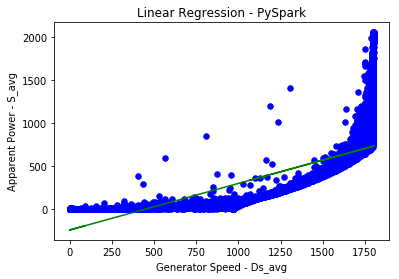

In [0]:
# Ds_avg vs S_avg

from pyspark import SQLContext, SparkConf, SparkContext
import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit
%matplotlib inline

conf = SparkConf().setMaster('local').setAppName('ML_learning')
x1 = data.toPandas()['Ds_avg'].values.tolist()
y1 = data.toPandas()['S_avg'].values.tolist()

plt.scatter(x1, y1, color='Blue', s=30)
plt.xlabel('Generator Speed - Ds_avg')
plt.ylabel('Apparent Power - S_avg')
plt.title('Linear Regression - PySpark')
p1 = polyfit(x1, y1 , 1)
plt.plot(x1, np.polyval(p1,x1), 'g-' )
plt.show()

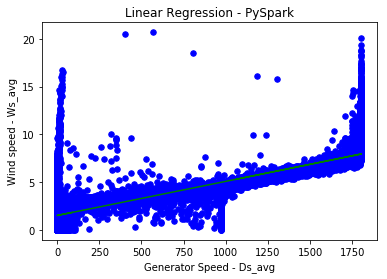

In [0]:
# Ds_avg vs Ws_avg

x1 = data.toPandas()['Ds_avg'].values.tolist()
y1 = data.toPandas()['Ws_avg'].values.tolist()

plt.scatter(x1, y1, color='Blue', s=30)
plt.xlabel('Generator Speed - Ds_avg')
plt.ylabel('Wind speed - Ws_avg')
plt.title('Linear Regression - PySpark')
p1 = polyfit(x1, y1 , 1)
plt.plot(x1, np.polyval(p1,x1), 'g-' )
plt.show()

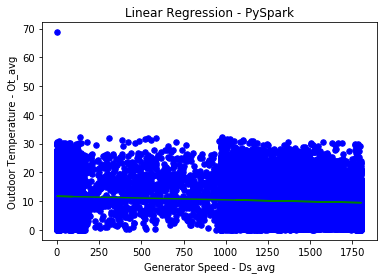

In [0]:
# Ds_avg vs Ot_avg

x1 = data.toPandas()['Ds_avg'].values.tolist()
y1 = data.toPandas()['Ot_avg'].values.tolist()

plt.scatter(x1, y1, color='Blue', s=30)
plt.xlabel('Generator Speed - Ds_avg')
plt.ylabel('Outdoor Temperature - Ot_avg')
plt.title('Linear Regression - PySpark')
p1 = polyfit(x1, y1 , 1)
plt.plot(x1, np.polyval(p1,x1), 'g-' )
plt.show()